In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('project2_data.csv')

# Examine the structure of the dataset
print(df.info())

# Get basic statistical summary
print(df.describe())

# Step 2: Data Cleaning
# Handle missing values
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.51947

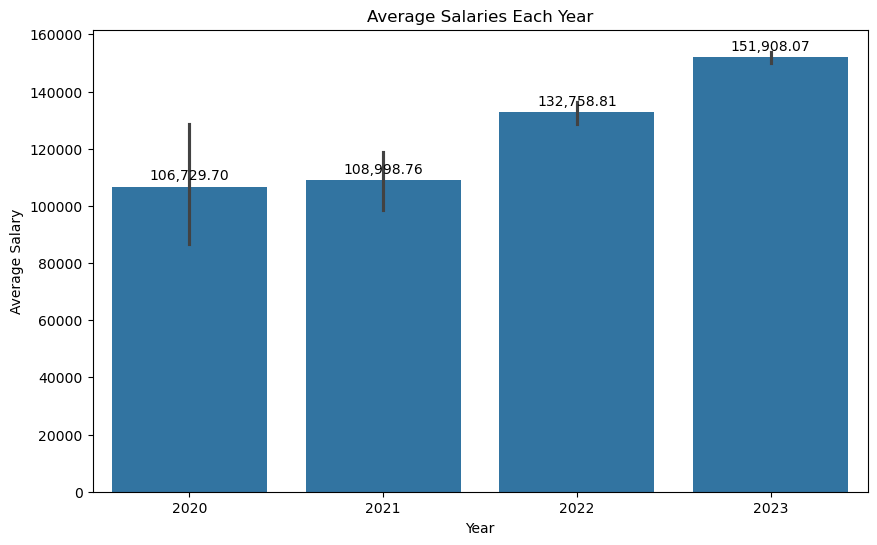

In [4]:
# 1. Get Average Salaries for Each Year

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

# Visualize Average Salaries Each Year
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='work_year', y='salary', data=df, estimator='mean')
plt.title('Average Salaries Each Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
add_salary_values(ax)
plt.show()

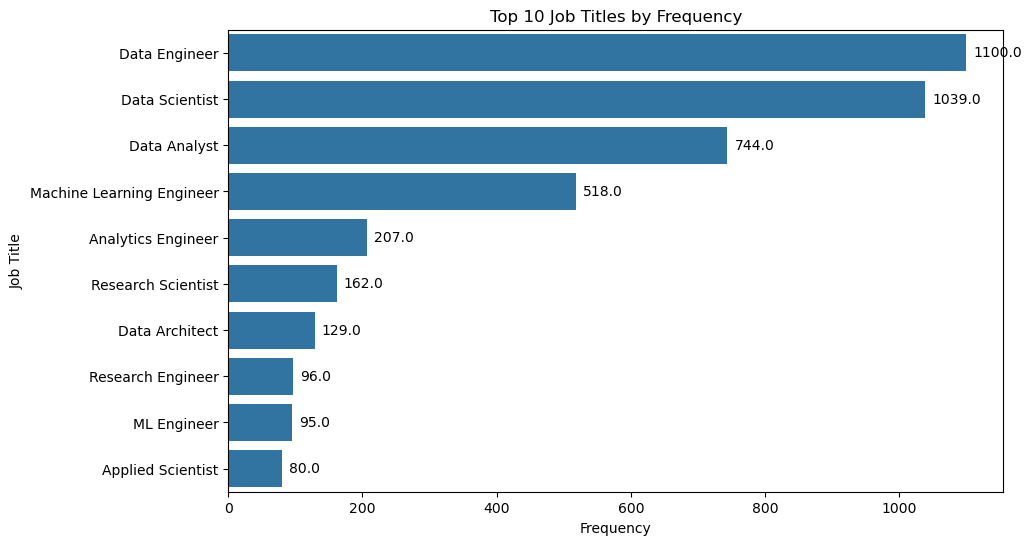

In [5]:
# 2. Get Frequency of Job Titles
def add_frequency_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Get Frequency of Job Titles (Top 10) - Horizontal Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index[:10])
plt.title('Top 10 Job Titles by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
add_frequency_values(ax)
plt.show()

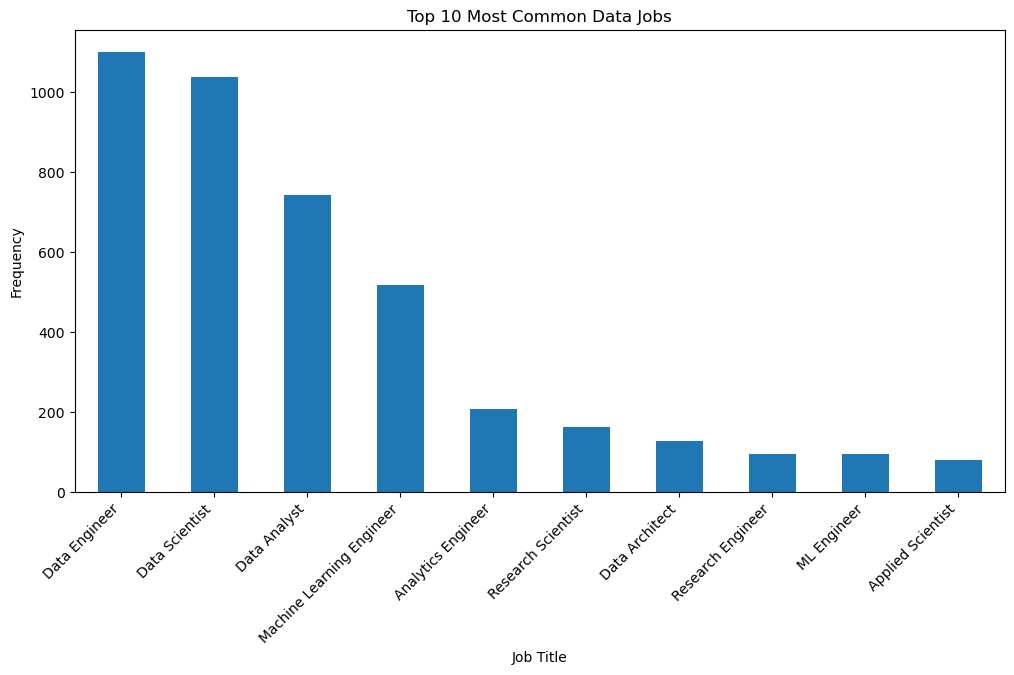

In [6]:
# 3. Get the Top 10 Most Common Data Jobs
top_10_jobs = df['job_title'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_10_jobs.plot(kind='bar')
plt.title('Top 10 Most Common Data Jobs')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/1s/501y3z_d60n18h8t1_2l24000000gn/T/ipykernel_20109/568102166.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='job_title', data=top_10_job_titles, palette='viridis')


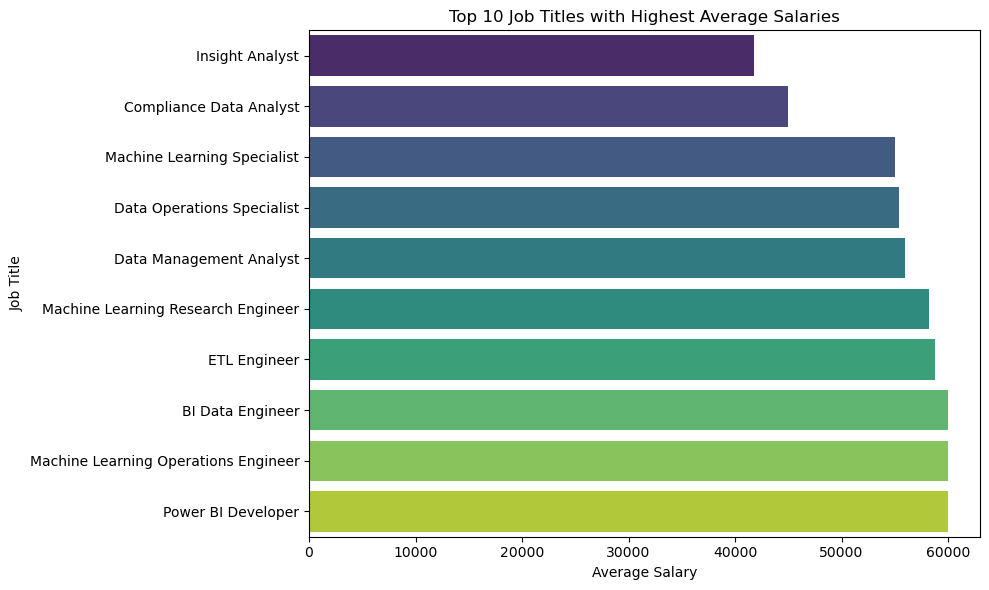

/var/folders/1s/501y3z_d60n18h8t1_2l24000000gn/T/ipykernel_20109/568102166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='job_title', data=top_job_titles, palette='rocket')


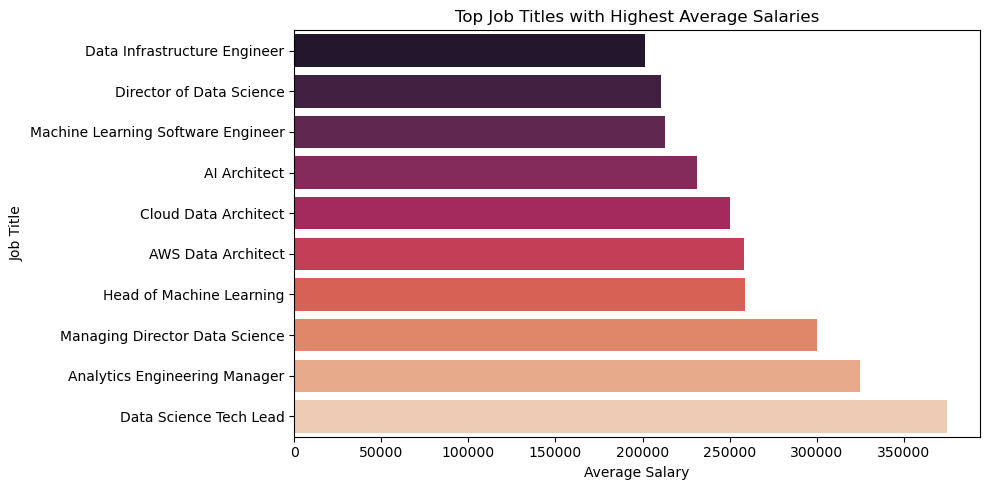

/var/folders/1s/501y3z_d60n18h8t1_2l24000000gn/T/ipykernel_20109/568102166.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='job_title', data=bottom_job_titles, palette='mako')


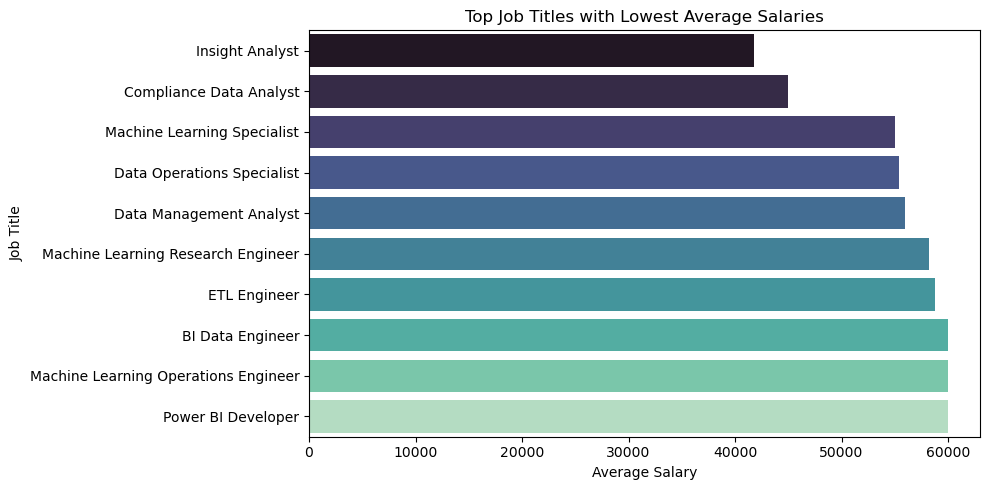

In [8]:
# 4. Visualize average salaries by job titles and the top job_titles with highest average salaries and least average salaries

# Calculate average salaries by job titles
avg_salary_by_job_title = df.groupby('job_title')['salary'].mean().reset_index()

# Sort job titles by average salary
avg_salary_by_job_title_sorted = avg_salary_by_job_title.sort_values(by='salary')

# Select only the top 10 job titles
top_10_job_titles = avg_salary_by_job_title_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='salary', y='job_title', data=top_10_job_titles, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles with Highest Average Salaries')
plt.tight_layout()
plt.show()

# Visualize top job titles with highest average salaries
top_job_titles = avg_salary_by_job_title_sorted.tail(10)  # You can adjust the number of top job titles to display
plt.figure(figsize=(10, 5))
sns.barplot(x='salary', y='job_title', data=top_job_titles, palette='rocket')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top Job Titles with Highest Average Salaries')
plt.tight_layout()
plt.show()

# Visualize top job titles with lowest average salaries
bottom_job_titles = avg_salary_by_job_title_sorted.head(10)  # You can adjust the number of bottom job titles to display
plt.figure(figsize=(10, 5))
sns.barplot(x='salary', y='job_title', data=bottom_job_titles, palette='mako')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top Job Titles with Lowest Average Salaries')
plt.tight_layout()
plt.show()

/var/folders/1s/501y3z_d60n18h8t1_2l24000000gn/T/ipykernel_20109/335331117.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='job_title', data=avg_salary_by_common_title_sorted, palette='viridis')


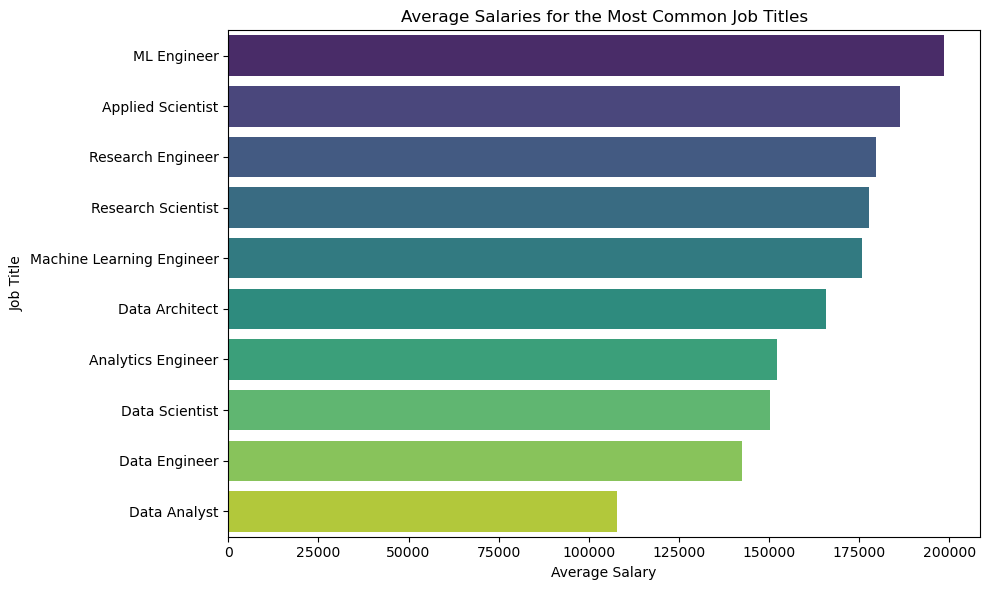

In [9]:
# 5. Visualize Average Salaries for the most common job titles

# Find the most common job titles
top_job_titles = df['job_title'].value_counts().head(10).index

# Filter the dataframe for only the most common job titles
df_common_titles = df[df['job_title'].isin(top_job_titles)]

# Calculate average salaries for the most common job titles
avg_salary_by_common_title = df_common_titles.groupby('job_title')['salary'].mean().reset_index()

# Sort the average salaries
avg_salary_by_common_title_sorted = avg_salary_by_common_title.sort_values(by='salary', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='salary', y='job_title', data=avg_salary_by_common_title_sorted, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Average Salaries for the Most Common Job Titles')
plt.tight_layout()
plt.show()

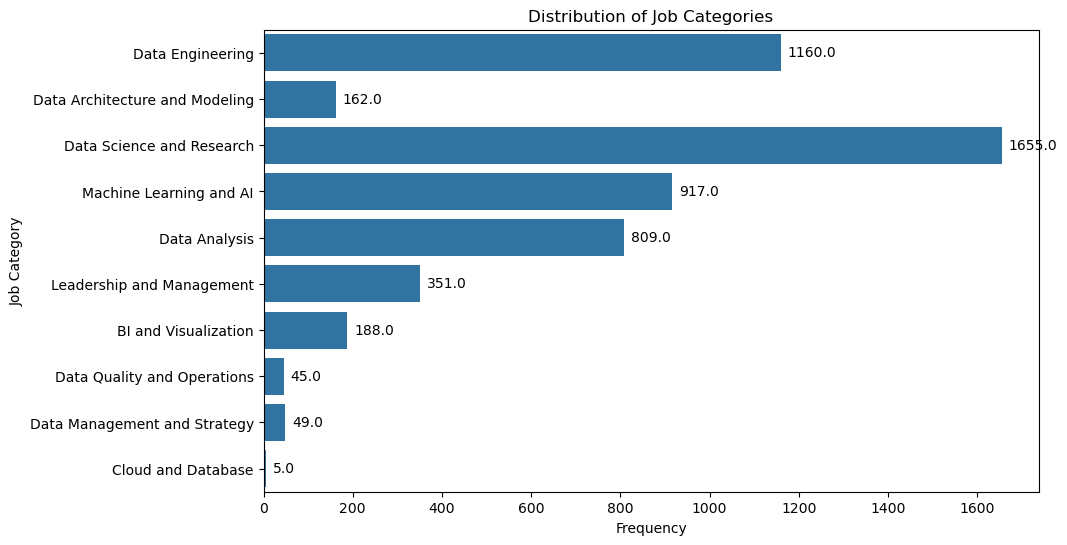

In [10]:
# 6. Visualize Distribution of Job Categories

def add_frequency_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Visualize Distribution of Job Categories (Horizontal Count Plot)
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='job_category', data=df)
plt.title('Distribution of Job Categories')
plt.xlabel('Frequency')
plt.ylabel('Job Category')
add_frequency_values(ax)
plt.show()

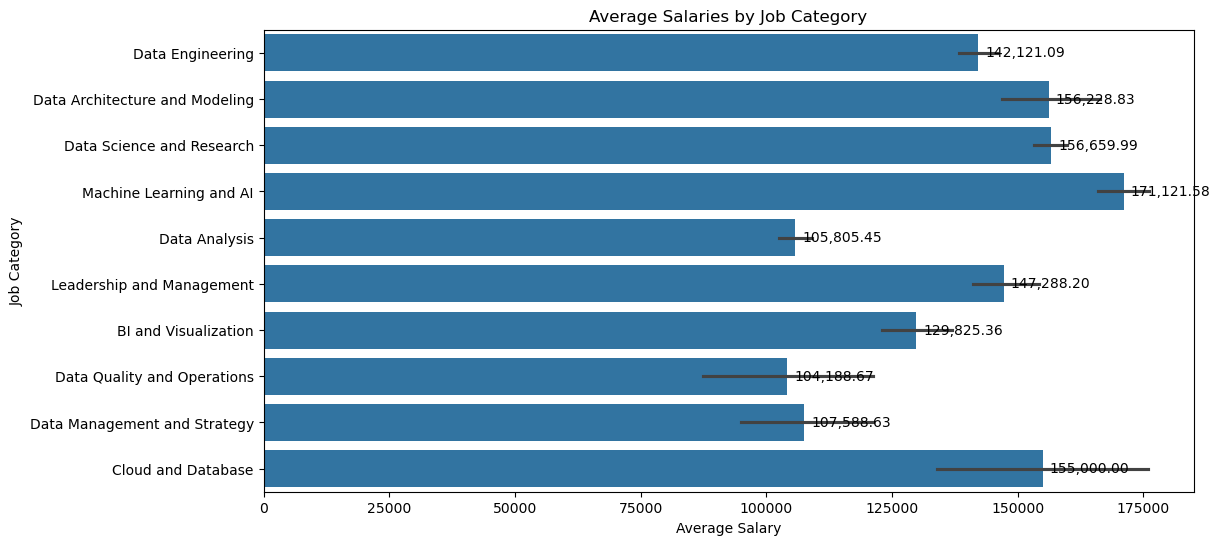

In [11]:
# 7. Visualize Average Salaries by Job Category

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='salary', y='job_category', data=df)
plt.title('Average Salaries by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
add_salary_values(ax)
plt.show()

/var/folders/1s/501y3z_d60n18h8t1_2l24000000gn/T/ipykernel_20109/2275197825.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='salary_in_usd', y='salary_currency', data=df, ci=None)


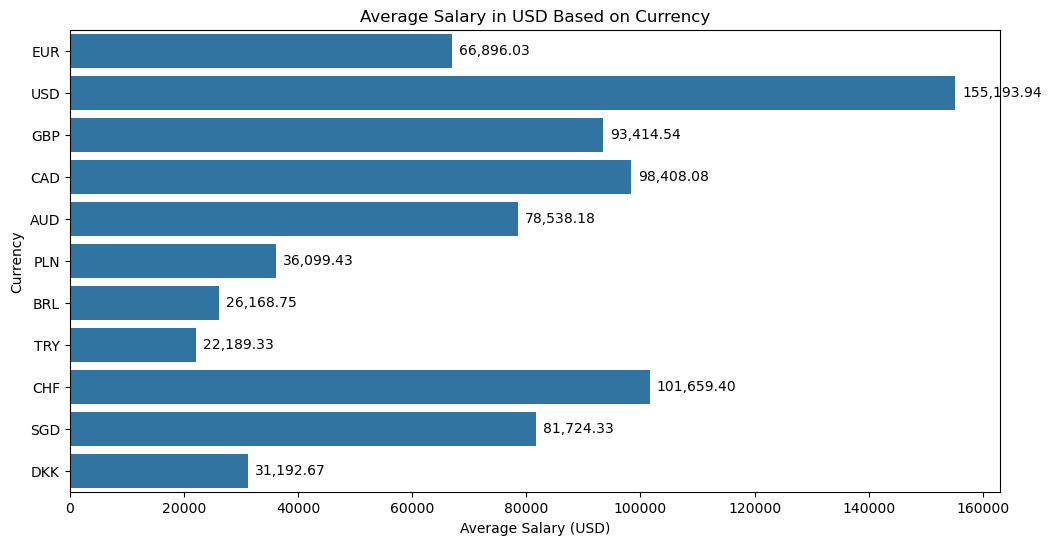

In [12]:
# 8. Visualize Average Salary in USD Based on Currency
def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='salary_in_usd', y='salary_currency', data=df, ci=None)
plt.title('Average Salary in USD Based on Currency')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Currency')
add_salary_values(ax)
plt.show()

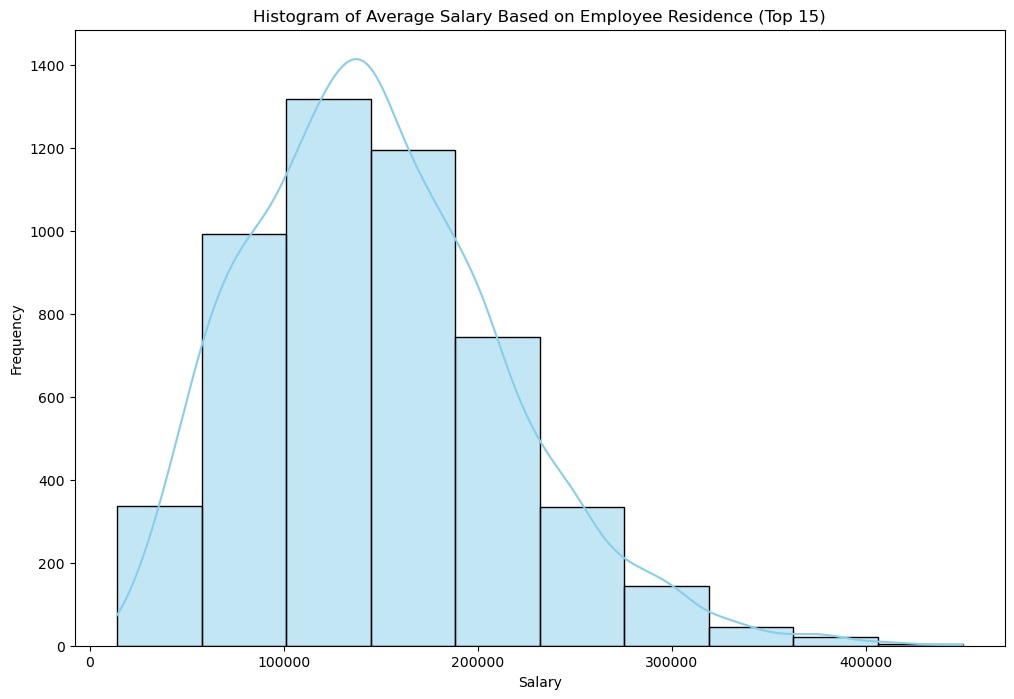

In [13]:
# 10. Visualize Average Salary Based on Employee Residence and Company Location 

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Get the top 15 employee residence locations
top_15_residences = df['employee_residence'].value_counts().head(15).index

# Filter the DataFrame for the top 15 employee residence locations
df_top_15 = df[df['employee_residence'].isin(top_15_residences)]

# Create a histogram for the top 15 locations
plt.figure(figsize=(12, 8))
sns.histplot(df_top_15['salary'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Average Salary Based on Employee Residence (Top 15)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

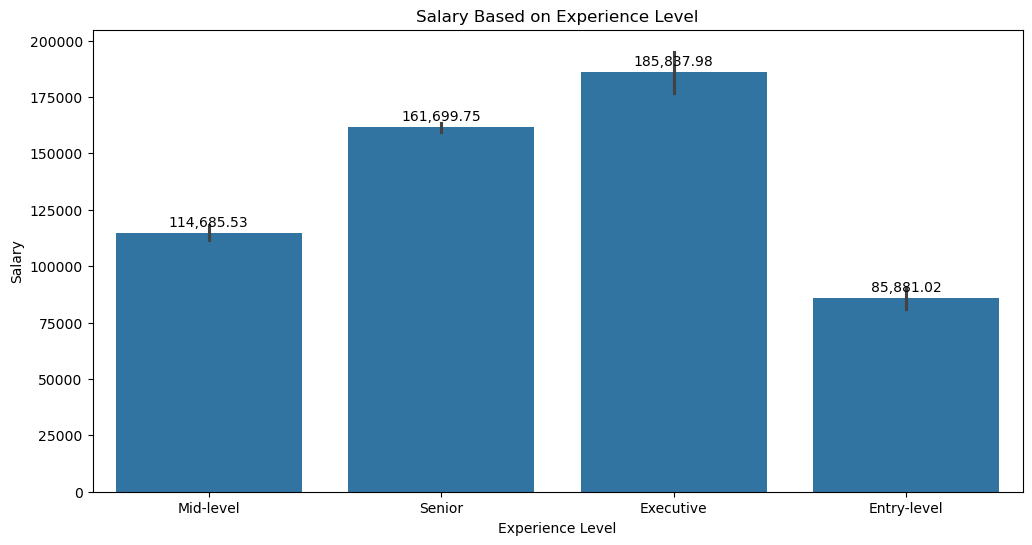

In [14]:
# 10. Visualize Salary Based on Experience Level

def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

# Visualize Salary Based on Experience Level (Barplot)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Based on Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
add_salary_values(ax)
plt.show()

/var/folders/1s/501y3z_d60n18h8t1_2l24000000gn/T/ipykernel_20109/2951726155.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='employment_type', y='salary', hue='work_setting', data=df, ci=None)


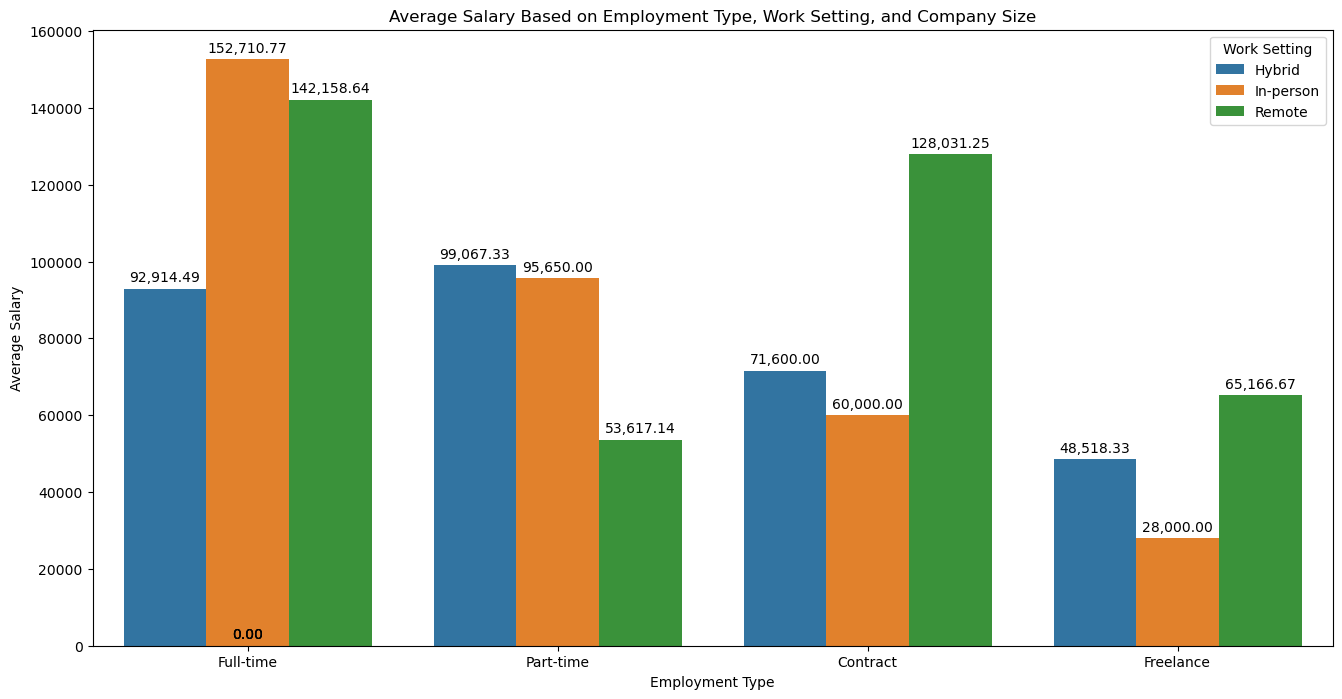

In [16]:
# 11. Visualize Average Salary Based on Employment Type, Work Setting, and Company Size
def add_salary_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='employment_type', y='salary', hue='work_setting', data=df, ci=None)
plt.title('Average Salary Based on Employment Type, Work Setting, and Company Size')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.legend(title='Work Setting')
add_salary_values(ax)
plt.show()